# Feature Engineering

In [1]:
# Data hanlding
import pandas as pd
import numpy as np

# Essential libraries
import os
import json
import time
import requests

# Data visualization
import plotly
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# sklearn
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# XGBoost classifier
from xgboost import XGBClassifier

# NLP
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import prepare

## Feature Extraction Methods:
- **Bag of Words**:  `sklearn.feature_extraction.text.CountVectorizer`
- **TF-IDF**: Term Frequency; Inverse Document Frequency

## Feauture
`readme_contents`

In [2]:
# Reading in data
df = pd.read_csv('metaverse.csv')

In [3]:
# Calling prepare function to clean dataframe
df = prepare.clean_data_objects(df)
df.head()

df shape: (998, 3)


,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,# Awesome Metaverse [![Awesome](https://awesom...
1,mvs-org/metaverse,C++,Metaverse Core Integration/staging Tree\n=====...
2,webaverse/app,JavaScript,"<img src=""docs/banner.jpeg"" width=100% />\n\n<..."
3,shadowcz007/awesome-metaverse,nan,"# awesome-metaverse\n<a href=""https://awesome...."
4,vircadia/vircadia,C++,"<p align=""center""><a href=""https://vircadia.co..."


In [4]:
# Calling mass_text_clean function to clean readme content
df["readme_contents"] = df["readme_contents"].apply(prepare.mass_text_clean)
df.head()

,repo,language,readme_contents
0,M3-org/awesome-metaverse,nan,awesome awesome awesome badge svg awesome list...
1,mvs-org/metaverse,C++,core integration staging tree build status tra...
2,webaverse/app,JavaScript,img src doc banner jpeg width 100 align center...
3,shadowcz007/awesome-metaverse,nan,awesome href awesome target blank img alt awes...
4,vircadia/vircadia,C++,align center href vircadia img src interface r...


In [5]:
# Using function to clean language
df = prepare.update_languages(df)

In [7]:
# Calling function to split data into train, validate, test
train, validate, test = prepare.train_validate_test_split(df, 'language')

train shape: (558, 3)
validate shape: (240, 3)
test shape: (200, 3)


In [8]:
train.head()

,repo,language,readme_contents
624,Spectruth/Metaverse,text,text
0,M3-org/awesome-metaverse,text,awesome awesome awesome badge svg awesome list...
643,flynnhandley/metaverse,other,h1 align center img src 124135 361502 raikfcqu...
181,GoMeta/leaderboard,other,leaderboard sample project repository contains...
750,qxl0/metaverse,Java,next tailwind cs show tailwind cs tailwindcss ...


***

## Bag of Words

In [234]:
cvr = CountVectorizer(max_features = 50, ngram_range=(1, 2))
words_train = cvr.fit_transform(train['readme_contents'])
X_train_a = pd.DataFrame(words_train.todense(), columns=cvr.get_feature_names_out())

In [235]:
X_train_a.head()

,08,08 2022,13,13 height,2022,2022 git,app,bit,blockchain,build,...,style,style display,summary,summary href,tailwindcss,user,vercel,width,width 13,www
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,3,1,10,5,...,0,0,0,0,0,5,0,0,0,24
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,2,0,2,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,3
4,0,0,0,0,0,0,6,0,0,0,...,0,0,0,0,12,0,10,0,0,0


In [236]:
X_train_a.shape

(558, 50)

In [237]:
words_validate = cvr.transform(validate['readme_contents'])
X_validate_a = pd.DataFrame(words_validate.todense(), columns=cvr.get_feature_names_out())

In [238]:
X_validate_a.shape

(240, 50)

In [239]:
words_test = cvr.transform(test['readme_contents'])
X_test_a= pd.DataFrame(words_test.todense(), columns=cvr.get_feature_names_out())

In [240]:
X_test_a.shape

(200, 50)

***

## TF IDF

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 50, ngram_range=(1, 2))
words_train = tfidf.fit_transform(train['readme_contents'])
X_train_b = pd.DataFrame(words_train.todense(), columns=tfidf.get_feature_names_out())

In [242]:
X_train_b.shape

(558, 50)

In [243]:
words_validate = tfidf.transform(validate['readme_contents'])
X_validate_b = pd.DataFrame(words_validate.todense(), columns=tfidf.get_feature_names_out())

In [244]:
X_validate_b.shape

(240, 50)

In [245]:
words_test = tfidf.transform(test['readme_contents'])
X_test_b = pd.DataFrame(words_test.todense(), columns=tfidf.get_feature_names_out())

In [246]:
X_test_b.shape

(200, 50)

## Target

In [22]:
y_train = train.language
y_validate = validate.language
y_test = test.language

***

# Modeling
- Decision Tree
- SVM (Support vector machine) classifier
- KNN (k-nearest neighbors) classifier 
- Naive Bayes classifier
- XGBoost

## Baseline

In [23]:
y_train.mode()

0    text
Name: language, dtype: object

In [24]:
train['baseline_pred'] = 'text'

In [26]:
baseline_accuracy = (train.language == train.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 31.72%


In [111]:
validate['baseline_pred'] = 'text'

In [112]:
baseline_accuracy = (validate.language == validate.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 31.67%


In [113]:
test['baseline_pred'] = 'text'

In [114]:
baseline_accuracy = (test.language == test.baseline_pred).mean()
print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 31.50%


## Decision Tree - Bag of words

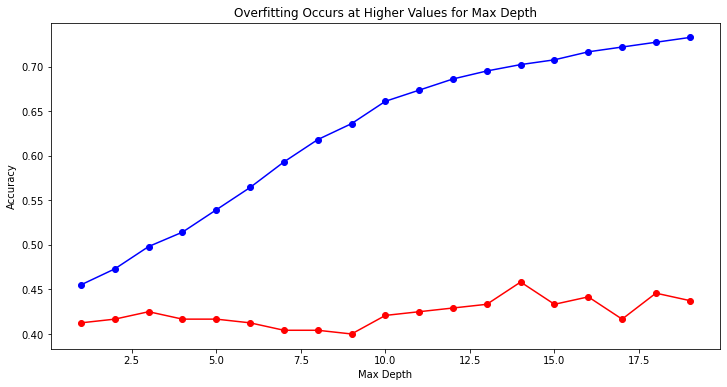

In [247]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 20):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_a, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_a, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_a, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


In [248]:
# Create the tree
tree = DecisionTreeClassifier(max_depth=14, random_state=123)

# Fit the model on train
tree = tree.fit(X_train_a, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train_a)

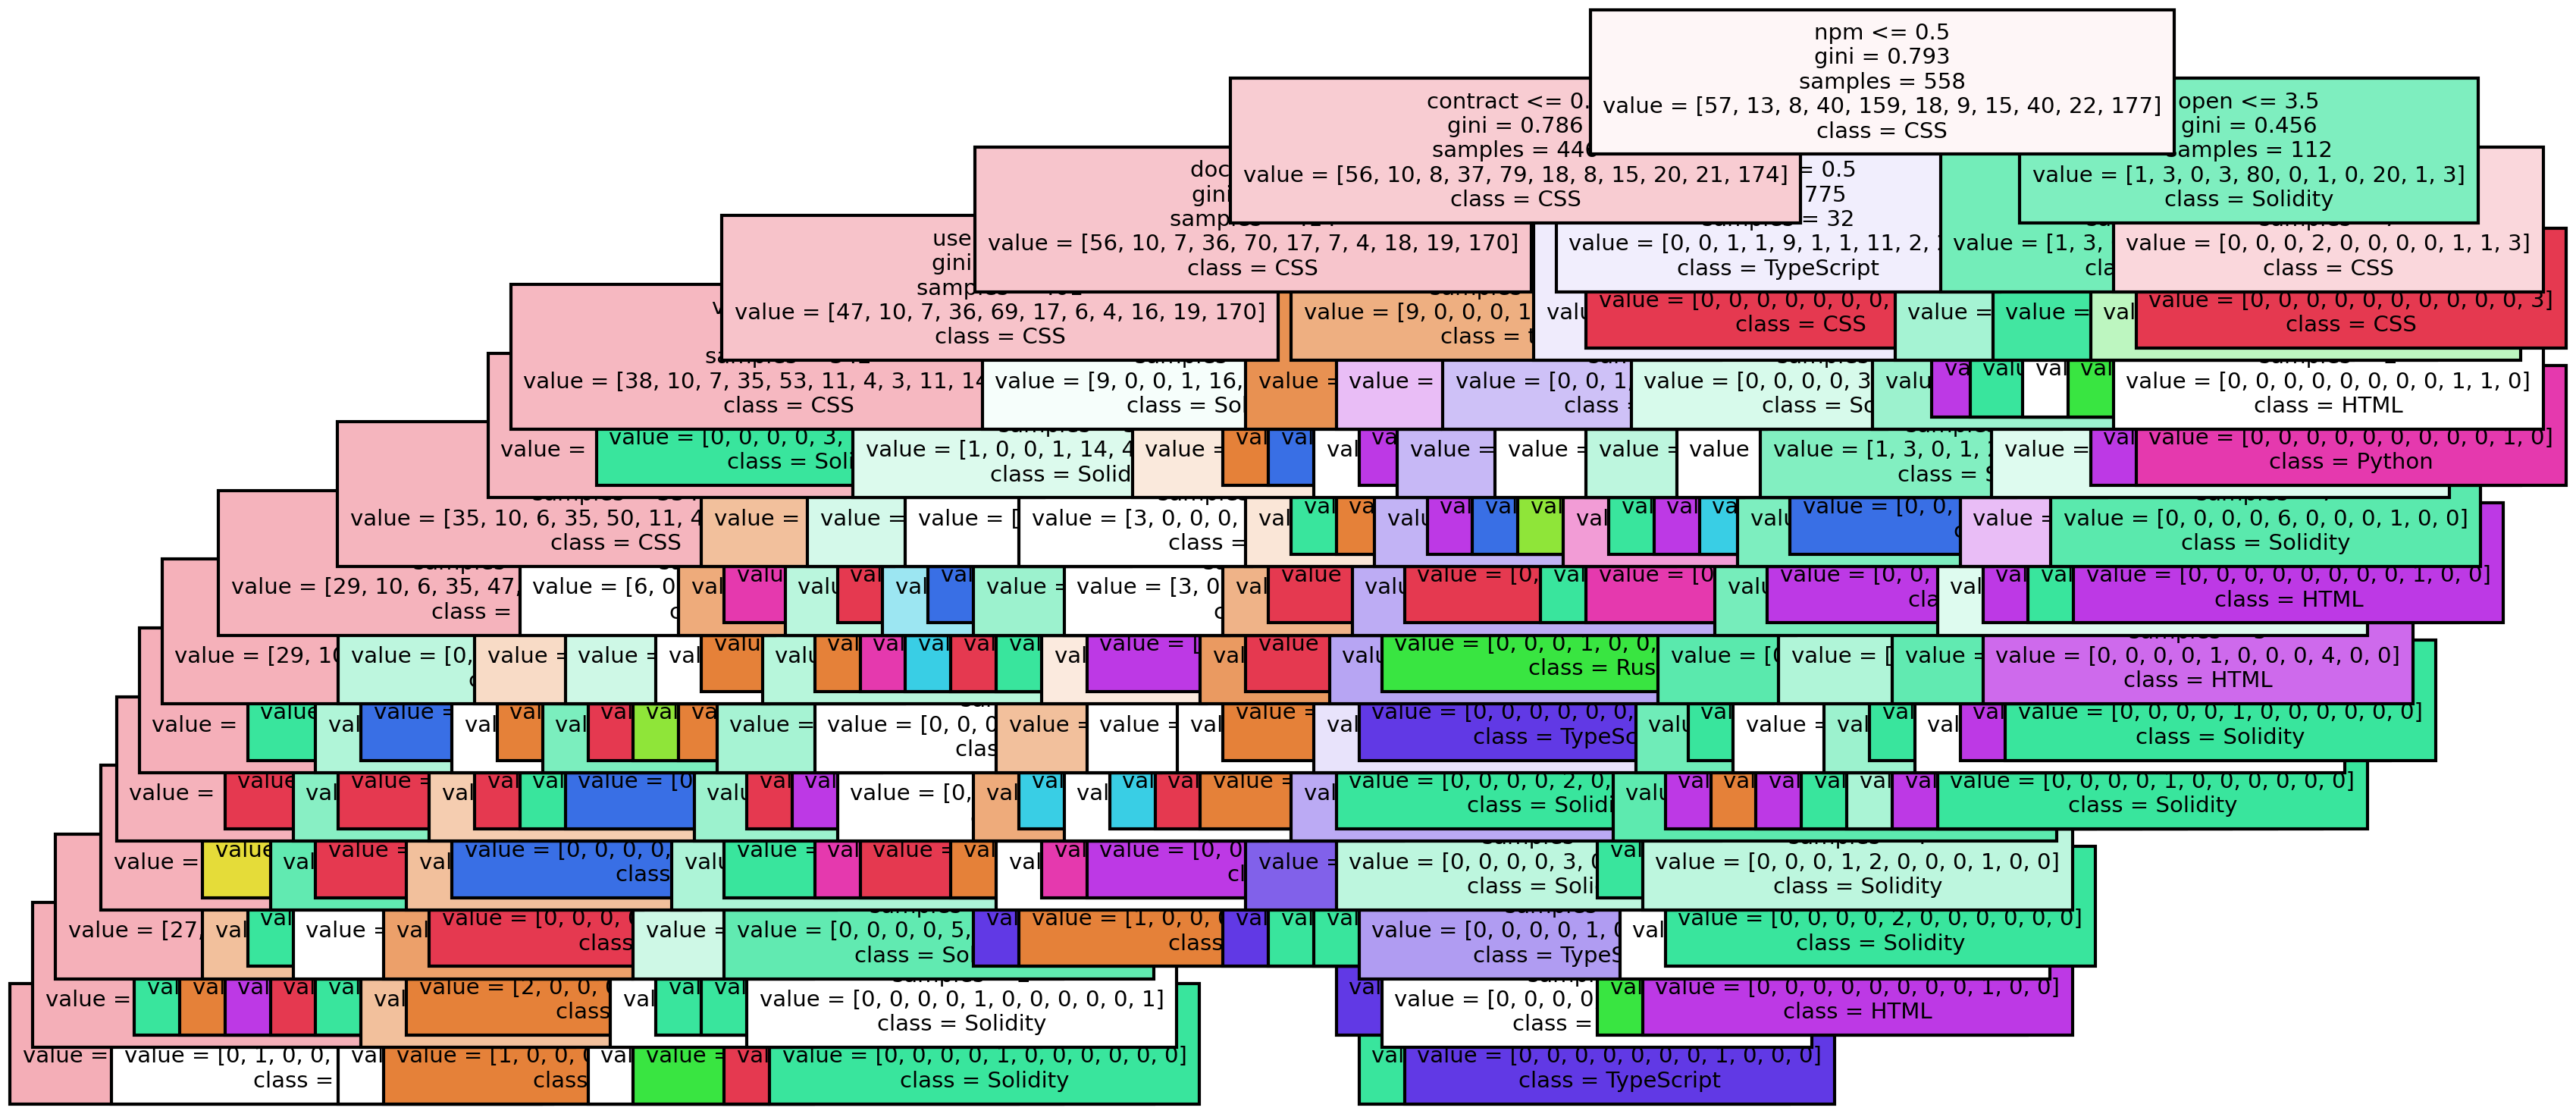

In [249]:
# Visualizing the tree
fig, ax = plt.subplots(figsize=(12,6), dpi = 300)
plot_tree(tree, feature_names=X_train_a.columns, class_names=y_train.unique(), filled=True, fontsize=7)
plt.show()

In [250]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train_a, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate_a, y_validate)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_test_a, y_test)))

Accuracy of Decision Tree classifier on training set: 0.703
Accuracy of Decision Tree classifier on validate set: 0.458
Accuracy of Decision Tree classifier on validate set: 0.470


## Decision Tree - TFIDF

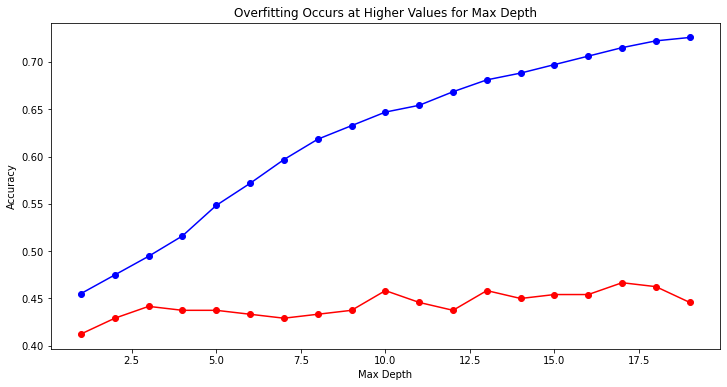

In [251]:
# max depth vs. model score, comparing training & validate datasets
metrics = []

for i in range(1, 20):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train_b, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train_b, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate_b, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.sort_values(by = ['validate_accuracy', 'difference'], ascending = [False, True])

# Visualizing model performance as we change the max depth, check if there's overfitting
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', color = 'blue')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', color = 'red')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()


In [252]:
# Create the tree
tree = DecisionTreeClassifier(max_depth=10, random_state=123)

# Fit the model on train
tree = tree.fit(X_train_b, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree.predict(X_train_b)

In [253]:
print('Accuracy of Decision Tree classifier on training set: {:.3f}'
      .format(tree.score(X_train_b, y_train)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_validate_b, y_validate)))
print('Accuracy of Decision Tree classifier on validate set: {:.3f}'
      .format(tree.score(X_test_b, y_test)))

Accuracy of Decision Tree classifier on training set: 0.647
Accuracy of Decision Tree classifier on validate set: 0.458
Accuracy of Decision Tree classifier on validate set: 0.465


## SVM (Support Vector Machine) Classifier - Bag of Words

In [254]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train_a, y_train)
svm_predictions = svm_model_linear.predict(X_validate_a)

# model accuracy for train and validate
accuracy = svm_model_linear.score(X_validate_a, y_validate)
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(svm_model_linear.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_validate_a, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_test_a, y_test)))

Accuracy of SVM classifier on training set: 0.627
Accuracy of SVM classifier on validate set: 0.475
Accuracy of SVM classifier on validate set: 0.465


## SVM (Support Vector Machine) Classifier - TFIDF

In [255]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 2).fit(X_train_b, y_train)
svm_predictions = svm_model_linear.predict(X_validate_b)

# model accuracy for train and validate
accuracy = svm_model_linear.score(X_validate_a, y_validate)
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(svm_model_linear.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_validate_b, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(svm_model_linear.score(X_test_b, y_test)))

Accuracy of SVM classifier on training set: 0.545
Accuracy of SVM classifier on validate set: 0.463
Accuracy of SVM classifier on validate set: 0.465


## KNN - Bag of Words

In [261]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train_a, y_train)

# model accuracy for train and validate 
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(knn.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_validate_a, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_test_a, y_test)))

Accuracy of SVM classifier on training set: 0.548
Accuracy of SVM classifier on validate set: 0.408
Accuracy of SVM classifier on validate set: 0.430


## KNN - TFIDF

In [264]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train_b, y_train)

# model accuracy for train and validate 
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(knn.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_validate_b, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(knn.score(X_test_b, y_test)))

Accuracy of SVM classifier on training set: 0.548
Accuracy of SVM classifier on validate set: 0.433
Accuracy of SVM classifier on validate set: 0.440


## Naive Bayes classifier - Bag of Words

In [257]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_a, y_train)

# model accuracy for X_test  
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(gnb.score(X_train_a, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_validate_a, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_test_a, y_test)))

Accuracy of SVM classifier on training set: 0.156
Accuracy of SVM classifier on validate set: 0.113
Accuracy of SVM classifier on validate set: 0.100


## Naive Bayes classifier - TFIDF

In [145]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_b, y_train)

# model accuracy for X_test  
print('Accuracy of SVM classifier on training set: {:.3f}'
      .format(gnb.score(X_train_b, y_train)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_validate_b, y_validate)))
print('Accuracy of SVM classifier on validate set: {:.3f}'
      .format(gnb.score(X_test_b, y_test)))

Accuracy of SVM classifier on training set: 0.063
Accuracy of SVM classifier on validate set: 0.050
Accuracy of SVM classifier on validate set: 0.035


## XGBoost - Bag of Words

In [106]:
from xgboost import XGBClassifier
def xg_model(x_train, y_train, x_validate, y_validate, x_test, y_test):

    # Fit model to training data
    model = XGBClassifier()
    
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)

    y_v_pred = model.predict(x_validate)

    y_t_pred = model.predict(x_test)
    print(classification_report(y_train, y_pred))

    print(classification_report(y_validate, y_v_pred))
    
    print(classification_report(y_test, y_t_pred))

In [66]:
new_y_train = y_train.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})

In [67]:
new_y_validate = y_validate.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})

In [102]:
new_y_test = y_test.map({'C': 0, 'CSS': 1, 'Go': 2, 'HTML': 3, 'Java':4, 'Python': 5, 'Rust': 6, 'Solidity': 7, 'TypeScript': 8, 'other': 9, 'text':10})

In [265]:
xg_model(X_train_a, new_y_train, X_validate_a, new_y_validate, X_test_a, new_y_test)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        57
           1       1.00      0.23      0.38        13
           2       1.00      0.25      0.40         8
           3       0.78      0.17      0.29        40
           4       0.93      0.79      0.85       159
           5       1.00      0.50      0.67        18
           6       1.00      1.00      1.00         9
           7       1.00      0.87      0.93        15
           8       1.00      0.70      0.82        40
           9       1.00      0.45      0.62        22
          10       0.56      0.98      0.71       177

    accuracy                           0.74       558
   macro avg       0.93      0.59      0.67       558
weighted avg       0.82      0.74      0.73       558

              precision    recall  f1-score   support

           0       0.38      0.33      0.36        24
           1       0.50      0.20      0.29         5
           2       0.50 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [266]:
xg_model(X_train_b, new_y_train, X_validate_b, new_y_validate, X_test_b, new_y_test)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        57
           1       1.00      0.23      0.38        13
           2       1.00      0.25      0.40         8
           3       0.70      0.17      0.28        40
           4       0.92      0.78      0.84       159
           5       1.00      0.39      0.56        18
           6       1.00      1.00      1.00         9
           7       1.00      0.80      0.89        15
           8       1.00      0.70      0.82        40
           9       1.00      0.50      0.67        22
          10       0.56      0.98      0.71       177

    accuracy                           0.73       558
   macro avg       0.92      0.58      0.66       558
weighted avg       0.81      0.73      0.72       558

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        24
           1       1.00      0.20      0.33         5
           2       0.00 

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
